# WWR Data Pre-processing Task - 1.1

__Problem Statement:__ Clean raw sensor data from a MPU 6050 IMU sensor which combines a 3-axis gyroscope and a 3-axis accelerometer, which can further be used to calculate the roll, pitch and yaw of the vehicle.

<font color=red> 1. Load the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import os
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy import interpolate, stats
import math

<font color=red> 2. Read data from MPURawData_0.csv

In [2]:
print(os.listdir())

['.git', '.ipynb_checkpoints', 'MPURawData_0.csv', 'MPURotationData_0.csv', 'WWR-Task 1.1.ipynb', 'WWR-Task 1.2.ipynb']


In [3]:
df_raw = pd.read_csv('MPURawData_0.csv')

In [4]:
df_raw

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z
0,0.0130,2.7031,0.1245,-9.9144,0.0032,-0.0106,0.2366
1,0.0264,2.6743,0.0790,-9.8258,0.0037,-0.0099,0.1908
2,0.0395,2.6384,0.1724,-9.6774,0.0050,-0.0121,0.2824
3,0.0529,2.7246,0.0838,-9.8330,0.0046,-0.0113,0.0840
4,0.0666,2.6288,0.0838,-9.9479,0.0054,-0.0116,0.3359
...,...,...,...,...,...,...,...
1219,23.0377,7.3502,-0.0814,3.5434,-0.1143,-1.9094,-44.6412
1220,23.0583,7.4771,0.4381,0.9792,0.0026,-1.9094,-54.2977
1221,23.0774,7.7788,1.0127,-1.6041,-0.0628,-1.9094,-60.8015
1222,23.0969,7.4891,1.9058,-3.4836,-0.2822,-1.9094,-71.1298


In [5]:
df_raw.head()

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z
0,0.0130,2.7031,0.1245,-9.9144,0.0032,-0.0106,0.2366
1,0.0264,2.6743,0.0790,-9.8258,0.0037,-0.0099,0.1908
2,0.0395,2.6384,0.1724,-9.6774,0.0050,-0.0121,0.2824
3,0.0529,2.7246,0.0838,-9.8330,0.0046,-0.0113,0.0840
4,0.0666,2.6288,0.0838,-9.9479,0.0054,-0.0116,0.3359


<font color=red>3. Check data quality

In [6]:
df_raw.dtypes

time              float64
acceleration x    float64
acceleration y    float64
acceleration z    float64
gyroscope x       float64
gyroscope y       float64
gyroscope z       float64
dtype: object

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            1224 non-null   float64
 1   acceleration x  1224 non-null   float64
 2   acceleration y  1224 non-null   float64
 3   acceleration z  1224 non-null   float64
 4   gyroscope x     1224 non-null   float64
 5   gyroscope y     1224 non-null   float64
 6   gyroscope z     1224 non-null   float64
dtypes: float64(7)
memory usage: 67.1 KB


In [8]:
df_raw.describe()

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000
mean,11.507798,7.095068,0.005040,-3.322562,-0.004238,0.008059,1.002186
std,6.685576,3.409640,0.770084,5.912467,0.229147,0.853886,13.521502
min,0.013000,-1.230600,-13.108300,-19.515100,-1.023400,-1.909400,-81.076300
25%,5.725000,2.700700,-0.122700,-9.761200,-0.052450,-0.109350,-0.379725
50%,11.517700,8.674200,0.081400,-3.606900,0.003900,-0.011600,0.217550
75%,17.257150,9.809600,0.138900,1.221600,0.032875,0.252025,2.353025
max,23.131800,19.612700,7.690200,17.046700,0.993400,1.909400,105.748100


In [9]:
df_raw.sort_values(by=['time'], inplace=True)

<font color=green>_Inspect, Clean, Verify and Report data_ 

<font color=red>4. Inspect the data i.e., data profiling and visualizating

In [10]:
df_raw.head()

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z
0,0.0130,2.7031,0.1245,-9.9144,0.0032,-0.0106,0.2366
1,0.0264,2.6743,0.0790,-9.8258,0.0037,-0.0099,0.1908
2,0.0395,2.6384,0.1724,-9.6774,0.0050,-0.0121,0.2824
3,0.0529,2.7246,0.0838,-9.8330,0.0046,-0.0113,0.0840
4,0.0666,2.6288,0.0838,-9.9479,0.0054,-0.0116,0.3359


In [11]:
missing_value = ['0']
df_raw = pd.read_csv('MPURawData_0.csv', na_values=missing_value)

In [12]:
df_raw.isnull().sum()

time              0
acceleration x    0
acceleration y    6
acceleration z    0
gyroscope x       0
gyroscope y       0
gyroscope z       1
dtype: int64

In [13]:
df_raw.isnull().any()

time              False
acceleration x    False
acceleration y     True
acceleration z    False
gyroscope x       False
gyroscope y       False
gyroscope z        True
dtype: bool

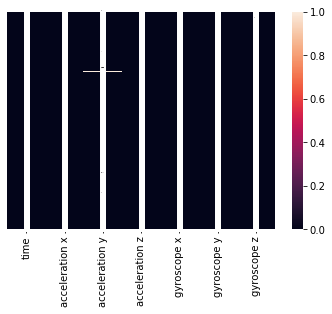

In [14]:
sb.heatmap(df_raw.isnull(), yticklabels=False, annot=True)

In [15]:
is_nan = df_raw.isnull()
row_has_nan = is_nan.any(axis=1)
rows_with_nan = df_raw[row_has_nan]
rows_with_nan

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z
16,0.2348,2.7102,NaN,-9.8258,0.0040,-0.0133,0.2214
54,0.9412,2.6600,0.1341,-9.9216,0.0052,-0.0139,NaN
244,4.5536,2.7102,NaN,-9.8809,0.0045,-0.0108,0.2443
339,6.3490,2.6408,NaN,-9.8426,0.0033,-0.0118,0.1756
927,17.4349,8.2863,NaN,5.7030,-0.3010,1.0769,-13.2214
929,17.4899,8.0756,NaN,5.2074,-0.0818,0.3355,-4.1221
1040,19.5977,8.0900,NaN,-1.2139,-0.4280,1.6863,-4.1298


In [16]:
duplicate_acc = df_raw[df_raw.duplicated(['acceleration x','acceleration y','acceleration z'], keep = False)]
duplicate_gy = df_raw[df_raw.duplicated(['gyroscope x','gyroscope y','gyroscope z'], keep = False)]
duplicate = df_raw[df_raw.duplicated(['acceleration x','acceleration y','acceleration z', 'gyroscope x','gyroscope y','gyroscope z'], keep = False)]

In [17]:
duplicate_acc

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z
31,0.5136,2.7198,0.1125,-9.7755,0.0040,-0.0113,0.2214
110,2.0049,2.7007,0.1508,-9.7923,0.0038,-0.0119,0.2824
316,5.9176,2.7007,0.1508,-9.7923,0.0033,-0.0114,0.1679
326,6.1055,2.7198,0.1125,-9.7755,0.0029,-0.0128,0.2137


In [18]:
duplicate_gy

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z
120,2.1967,2.6528,0.1245,-9.6774,0.0033,-0.0114,0.2901
123,2.2530,2.6647,0.0694,-9.9599,0.0043,-0.0117,0.1450
187,3.4801,2.7390,0.1077,-9.8976,0.0043,-0.0117,0.1450
325,6.0868,2.6767,0.1484,-9.7444,0.0033,-0.0114,0.2901


In [19]:
duplicate

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z


Since the data we are working with is a raw dataset, we need to first calculate the acceleration (from accelerometer raw data) and angular velocity (from gyroscope raw data) by dividing sensor raw data with their sensitivity scale factor.

source: 
- https://www.electronicwings.com/sensors-modules/mpu6050-gyroscope-accelerometer-temperature-sensor-module
- https://howtomechatronics.com/tutorials/arduino/arduino-and-mpu6050-accelerometer-and-gyroscope-tutorial/

In [20]:
df = df_raw.copy()

In [21]:
df['acceleration x'] = df['acceleration x']/16384
df['acceleration y'] = df['acceleration y']/16384
df['acceleration z'] = df['acceleration z']/16384

# in g force

In [22]:
df['gyroscope x'] = df['gyroscope x']/131
df['gyroscope y'] = df['gyroscope y']/131
df['gyroscope z'] = df['gyroscope z']/131

# in degree per second

In [23]:
df

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z
0,0.0130,0.000165,0.000008,-0.000605,0.000024,-0.000081,0.001806
1,0.0264,0.000163,0.000005,-0.000600,0.000028,-0.000076,0.001456
2,0.0395,0.000161,0.000011,-0.000591,0.000038,-0.000092,0.002156
3,0.0529,0.000166,0.000005,-0.000600,0.000035,-0.000086,0.000641
4,0.0666,0.000160,0.000005,-0.000607,0.000041,-0.000089,0.002564
...,...,...,...,...,...,...,...
1219,23.0377,0.000449,-0.000005,0.000216,-0.000873,-0.014576,-0.340773
1220,23.0583,0.000456,0.000027,0.000060,0.000020,-0.014576,-0.414486
1221,23.0774,0.000475,0.000062,-0.000098,-0.000479,-0.014576,-0.464134
1222,23.0969,0.000457,0.000116,-0.000213,-0.002154,-0.014576,-0.542976


Analyzing and visualizing the data can help us look for outliers which may or may not necessarily be incorrect but still worth inspecting.

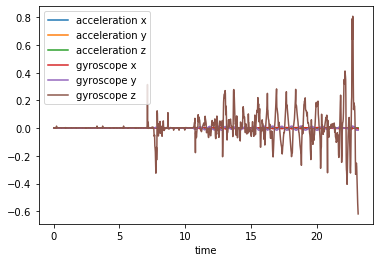

In [24]:
df.plot.line(x='time')

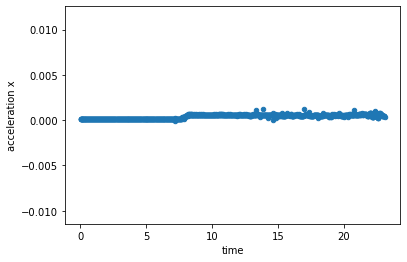

In [25]:
df.plot.scatter(x='time', y='acceleration x')

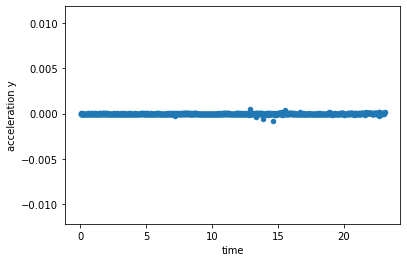

In [26]:
df.plot.scatter(x='time', y='acceleration y')

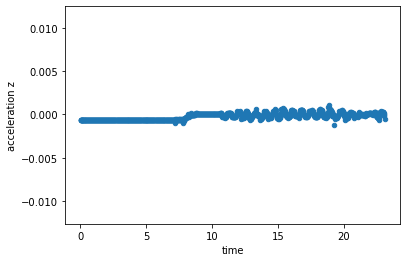

In [27]:
df.plot.scatter(x='time', y='acceleration z')

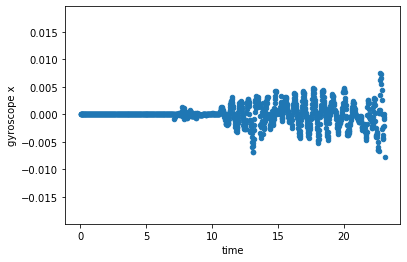

In [28]:
df.plot.scatter(x='time', y='gyroscope x')

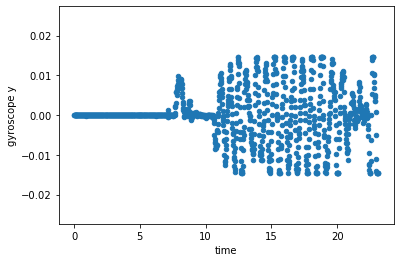

In [29]:
df.plot.scatter(x='time', y='gyroscope y')

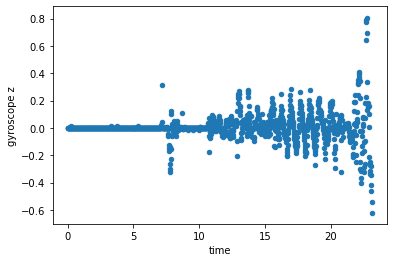

In [30]:
df.plot.scatter(x='time', y='gyroscope z')

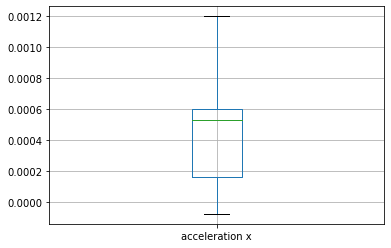

In [31]:
df.boxplot(column='acceleration x')

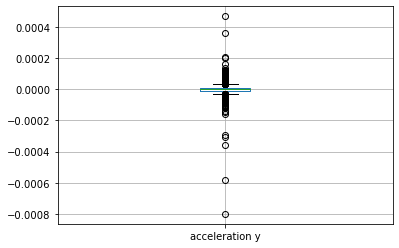

In [32]:
df.boxplot(column='acceleration y')

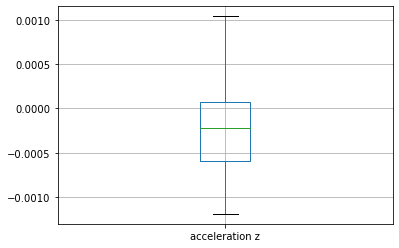

In [33]:
df.boxplot(column='acceleration z')

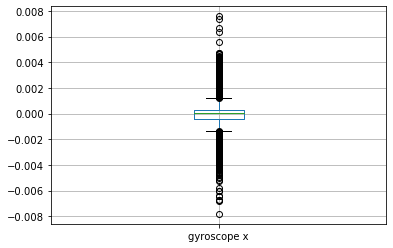

In [34]:
df.boxplot(column='gyroscope x')

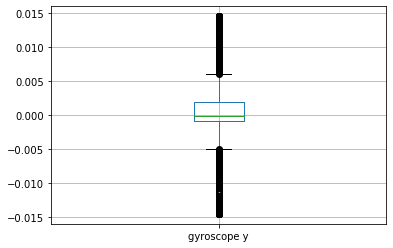

In [35]:
df.boxplot(column='gyroscope y')

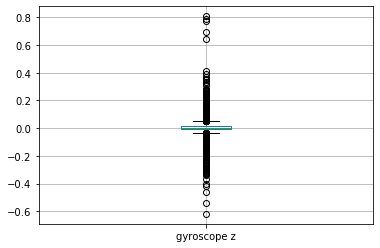

In [36]:
df.boxplot(column='gyroscope z')

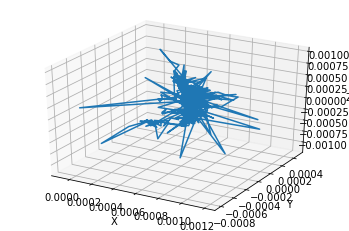

In [37]:
ax = plt.axes(projection='3d')
x = df['acceleration x']
y = df['acceleration y']
z = df['acceleration z']
ax.plot3D(x,y,z, label='Acceleration')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

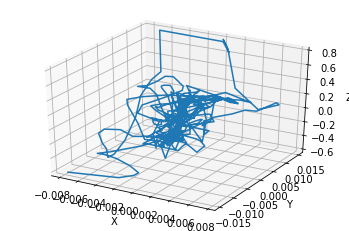

In [38]:
gy = plt.axes(projection='3d')
x = df['gyroscope x']
y = df['gyroscope y']
z = df['gyroscope z']
gy.plot3D(x,y,z, label='Gyroscope')
gy.set_xlabel('X')
gy.set_ylabel('Y')
gy.set_zlabel('Z')
plt.show()

In [39]:
#acc3d = plt.figure().gca(projection='3d')
#acc3d.scatter(df['acceleration x'], df['acceleration y'], df['acceleration z'])
#acc3d.set_xlabel('Acc. X')
#acc3d.set_ylabel('Acc. Y')
#acc3d.set_zlabel('Acc. Z')
#plt.show()

In [40]:
#gyro3d = plt.figure().gca(projection='3d')
#gyro3d.scatter(df['gyroscope x'], df['gyroscope y'], df['gyroscope z'])
#gyro3d.set_xlabel('Gyro. X')
#gyro3d.set_ylabel('Gyro. Y')
#gyro3d.set_zlabel('Gyro. Z')
#plt.show()

The duplicate values of acceleration and gyroscope occur at different instances of time, therefore inspecting them further won't be necessary.

NULL values will can either be removed all together or be estimated using different approaches. As we are working with a dataset that concerns itself with very small increments in time, getting rid of any data could lead to loss of valuable information. Therefore we'll be using interpolation, i.e., estimating the unknown values that fall in between known values, to impute values to missing cells.

In [41]:
df_replace_null = df.interpolate(method='linear',axis=0)

In [42]:
df_replace_null

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z
0,0.0130,0.000165,0.000008,-0.000605,0.000024,-0.000081,0.001806
1,0.0264,0.000163,0.000005,-0.000600,0.000028,-0.000076,0.001456
2,0.0395,0.000161,0.000011,-0.000591,0.000038,-0.000092,0.002156
3,0.0529,0.000166,0.000005,-0.000600,0.000035,-0.000086,0.000641
4,0.0666,0.000160,0.000005,-0.000607,0.000041,-0.000089,0.002564
...,...,...,...,...,...,...,...
1219,23.0377,0.000449,-0.000005,0.000216,-0.000873,-0.014576,-0.340773
1220,23.0583,0.000456,0.000027,0.000060,0.000020,-0.014576,-0.414486
1221,23.0774,0.000475,0.000062,-0.000098,-0.000479,-0.014576,-0.464134
1222,23.0969,0.000457,0.000116,-0.000213,-0.002154,-0.014576,-0.542976


In [43]:
#df.dropna(subset=['acceleration y','gyroscope z'], inplace=True)
#df

In [44]:
#df.reset_index()

In [45]:
df_replace_null.iloc[15:18]

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z
15,0.2212,0.000167,5.700684e-06,-0.000599,0.000024,-0.000092,0.014626
16,0.2348,0.000165,3.143311e-06,-0.000600,0.000031,-0.000102,0.001690
17,0.2526,0.000161,5.859375e-07,-0.000599,0.000024,-0.000088,0.002040


In [46]:
df_replace_null.describe()

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z
count,1224.000000,1224.000000,1.224000e+03,1224.000000,1224.000000,1224.000000,1224.000000
mean,11.507798,0.000433,3.098157e-07,-0.000203,-0.000032,0.000062,0.007652
std,6.685576,0.000208,4.700426e-05,0.000361,0.001749,0.006518,0.103217
min,0.013000,-0.000075,-8.000671e-04,-0.001191,-0.007812,-0.014576,-0.618903
25%,5.725000,0.000165,-7.635498e-06,-0.000596,-0.000400,-0.000835,-0.002899
50%,11.517700,0.000529,4.968262e-06,-0.000220,0.000030,-0.000089,0.001690
75%,17.257150,0.000599,8.477783e-06,0.000075,0.000251,0.001924,0.017962
max,23.131800,0.001197,4.693726e-04,0.001040,0.007583,0.014576,0.807237


Accelerometer sensors measure the difference between any linear acceleration in the accelerometer’s reference frame and the earth's gravitational field vector. In the absence of linear acceleration, the accelerometer output is a measurement of the rotated gravitational field vector and can be used to determine the accelerometer pitch and roll orientation angles.

Gyroscope sensor is a device that can measure and maintain the orientation and angular velocity of an object. These are more advanced than accelerometers. These can measure the tilt and lateral orientation of the object whereas accelerometer can only measure the linear motion.

source: https://github.com/jrowberg/i2cdevlib/blob/master/Arduino/MPU6050/examples/MPU6050_DMP6/Processing/MPUTeapot/MPUTeapot.pde


Since we will be using complementary filter i.e., combining accelerometer (x and y axes) and gyroscope (x and y axes) data to calculate roll and pitch, it is important to rectify any outliers. 

In [47]:
df1 = df_replace_null.copy()

In [48]:
df1['acceleration x'].skew()

-0.22071184902809973

In [49]:
df1['acceleration y'].skew()

-5.03067814010855

In [50]:
df1['acceleration z'].skew()

0.3122782459036659

In [51]:
df1['gyroscope x'].skew()

-0.17836146895895988

In [52]:
df1['gyroscope y'].skew()

-0.07379346635270606

In [53]:
df1['gyroscope z'].skew()

1.0459017975953906

To identify the outliers, we will calculate both, the Inter Quartile Range as well as the Z-Score, as the IQR tells us about the spread of our data while the Z-Score points out the outliers.

In [54]:
IQR_accx = df1['acceleration x'].quantile(0.75)-df1['acceleration x'].quantile(0.25)
IQR_accx

0.000433892822265625

In [55]:
upper_outlier_accx = df1['acceleration x'].quantile(0.75) + 1.5*IQR_accx
lower_outlier_accx = df1['acceleration x'].quantile(0.25) - 1.5*IQR_accx

In [56]:
upper_outlier_accx

0.0012495697021484376

In [57]:
lower_outlier_accx

-0.0004860015869140626

In [58]:
outlier_val_accx = df1[(df1['acceleration x'] >= upper_outlier_accx) | (df1['acceleration x'] <= lower_outlier_accx)]
outlier_val_accx

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z


In [59]:
IQR_accy = df1['acceleration y'].quantile(0.75)-df1['acceleration y'].quantile(0.25)
IQR_accy

1.611328125e-05

In [60]:
upper_outlier_accy = df1['acceleration y'].quantile(0.75) + 1.5*IQR_accy
lower_outlier_accy = df1['acceleration y'].quantile(0.25) - 1.5*IQR_accy

In [61]:
upper_outlier_accy

3.2647705078125e-05

In [62]:
lower_outlier_accy

-3.1805419921875e-05

In [63]:
outlier_val_accy = df1[(df1['acceleration y'] >= upper_outlier_accy) | (df1['acceleration y'] <= lower_outlier_accy)]
outlier_val_accy

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z
379,7.1285,0.000068,-0.000114,-0.000669,-0.000792,-0.000447,0.314667
380,7.1474,-0.000075,-0.000305,-0.000965,-0.000493,0.001214,0.002215
411,7.7660,0.000319,-0.000034,-0.000488,0.000918,0.005686,-0.325040
416,7.8622,0.000121,0.000061,-0.000782,0.000880,0.009743,0.124818
417,7.8817,0.000293,-0.000049,-0.000490,-0.000187,0.008922,0.105647
...,...,...,...,...,...,...,...
1217,22.9994,0.000494,0.000060,0.000308,-0.003687,-0.014576,-0.252491
1218,23.0186,0.000475,0.000039,0.000226,-0.002318,-0.014576,-0.275625
1221,23.0774,0.000475,0.000062,-0.000098,-0.000479,-0.014576,-0.464134
1222,23.0969,0.000457,0.000116,-0.000213,-0.002154,-0.014576,-0.542976


In [64]:
IQR_accz = df1['acceleration z'].quantile(0.75)-df1['acceleration z'].quantile(0.25)
IQR_accz

0.0006703369140625001

In [65]:
upper_outlier_accz = df1['acceleration z'].quantile(0.75) + 1.5*IQR_accz
lower_outlier_accz = df1['acceleration z'].quantile(0.25) - 1.5*IQR_accz

In [66]:
upper_outlier_accz

0.0010800659179687501

In [67]:
lower_outlier_accz

-0.0016012817382812503

In [68]:
outlier_val_accz = df1[(df1['acceleration z'] >= upper_outlier_accz) | (df1['acceleration z'] <= lower_outlier_accz)]
outlier_val_accz

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z


In [69]:
IQR_gyx = df1['gyroscope x'].quantile(0.75)-df1['gyroscope x'].quantile(0.25)
IQR_gyx

0.0006513358778625955

In [70]:
upper_outlier_gyx = df1['gyroscope x'].quantile(0.75) + 1.5*IQR_gyx
lower_outlier_gyx = df1['gyroscope x'].quantile(0.25) - 1.5*IQR_gyx

In [71]:
upper_outlier_gyx

0.001227958015267176

In [72]:
lower_outlier_gyx

-0.0013773854961832064

In [73]:
outlier_val_gyx = df1[(df1['gyroscope x'] >= upper_outlier_gyx) | (df1['gyroscope x'] <= lower_outlier_gyx)]
outlier_val_gyx

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z
410,7.7468,0.000302,-0.000006,-0.000631,0.001430,0.005757,-0.263388
568,10.6968,0.000591,0.000008,-0.000022,0.001260,-0.006855,0.039799
569,10.7152,0.000627,-0.000009,0.000116,0.001353,-0.007124,0.038285
570,10.7329,0.000540,-0.000002,-0.000006,0.001423,-0.008506,0.070800
586,11.0342,0.000558,-0.000018,-0.000290,-0.001547,0.005771,0.079308
...,...,...,...,...,...,...,...
1216,22.9784,0.000488,0.000063,0.000250,-0.004556,-0.014178,-0.270847
1217,22.9994,0.000494,0.000060,0.000308,-0.003687,-0.014576,-0.252491
1218,23.0186,0.000475,0.000039,0.000226,-0.002318,-0.014576,-0.275625
1222,23.0969,0.000457,0.000116,-0.000213,-0.002154,-0.014576,-0.542976


In [74]:
IQR_gyy = df1['gyroscope y'].quantile(0.75)-df1['gyroscope y'].quantile(0.25)
IQR_gyy

0.0027585877862595417

In [75]:
upper_outlier_gyy = df1['gyroscope y'].quantile(0.75) + 1.5*IQR_gyy
lower_outlier_gyy = df1['gyroscope y'].quantile(0.25) - 1.5*IQR_gyy

In [76]:
upper_outlier_gyy

0.006061736641221374

In [77]:
lower_outlier_gyy

-0.004972614503816793

In [78]:
outlier_val_gyy = df1[(df1['gyroscope y'] >= upper_outlier_gyy) | (df1['gyroscope y'] <= lower_outlier_gyy)]
outlier_val_gyy

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z
413,7.8071,0.000259,0.000015,-0.000965,0.000782,0.006090,-0.138395
414,7.8249,0.000381,-0.000019,-0.000513,0.000459,0.006470,-0.229824
415,7.8435,0.000288,0.000006,-0.000568,0.001171,0.007292,-0.153196
416,7.8622,0.000121,0.000061,-0.000782,0.000880,0.009743,0.124818
417,7.8817,0.000293,-0.000049,-0.000490,-0.000187,0.008922,0.105647
...,...,...,...,...,...,...,...
1219,23.0377,0.000449,-0.000005,0.000216,-0.000873,-0.014576,-0.340773
1220,23.0583,0.000456,0.000027,0.000060,0.000020,-0.014576,-0.414486
1221,23.0774,0.000475,0.000062,-0.000098,-0.000479,-0.014576,-0.464134
1222,23.0969,0.000457,0.000116,-0.000213,-0.002154,-0.014576,-0.542976


In [79]:
threshold = 3
zscore_accx = np.abs(stats.zscore(df1['acceleration x']))
df1['acceleration x'].iloc[zscore_accx > threshold]

708     0.001138
738     0.001197
901     0.001197
1103    0.001126
Name: acceleration x, dtype: float64

In [80]:
zscore_accy = np.abs(stats.zscore(df1['acceleration y']))
df1['acceleration y'].iloc[zscore_accy > threshold]

380    -0.000305
683     0.000469
708    -0.000357
738    -0.000581
757    -0.000148
775    -0.000800
829     0.000363
886     0.000210
1063   -0.000160
1201   -0.000292
1203    0.000162
1223    0.000201
Name: acceleration y, dtype: float64

In [81]:
zscore_accz = np.abs(stats.zscore(df1['acceleration z']))
df1['acceleration z'].iloc[zscore_accz > threshold]

1003    0.00104
Name: acceleration z, dtype: float64

In [82]:
zscore_gyx = np.abs(stats.zscore(df1['gyroscope x']))
df1['gyroscope x'].iloc[zscore_gyx > threshold]

694    -0.006005
695    -0.006769
696    -0.006758
697    -0.005827
1197   -0.005991
1198   -0.006421
1199   -0.006406
1200   -0.006711
1206    0.006329
1207    0.007583
1208    0.007331
1209    0.006642
1210    0.005579
1223   -0.007812
Name: gyroscope x, dtype: float64

In [83]:
zscore_gyy = np.abs(stats.zscore(df1['gyroscope y']))
df1['gyroscope y'].iloc[zscore_gyy > threshold]

Series([], Name: gyroscope y, dtype: float64)

In [84]:
zscore_gyz = np.abs(stats.zscore(df1['gyroscope z']))
df1['gyroscope z'].iloc[zscore_gyz > threshold]

411    -0.325040
1102   -0.322009
1167    0.330400
1168    0.351320
1169    0.318630
1170    0.353301
1171    0.412214
1172    0.393392
1173    0.370608
1174    0.346716
1179   -0.312278
1180   -0.365189
1181   -0.405396
1182   -0.308373
1194   -0.323874
1200    0.788415
1201    0.776062
1202    0.640522
1203    0.807237
1204    0.692267
1205    0.333780
1214   -0.333489
1215   -0.315075
1219   -0.340773
1220   -0.414486
1221   -0.464134
1222   -0.542976
1223   -0.618903
Name: gyroscope z, dtype: float64

As the outliers amount to a total of 4.8% of our data, rather than removing them, we'll cap them, i.e., change their values to the extreme quantiles.

In [85]:
df_filter = df1.copy()

In [86]:
df_filter['Z-Score accx'] = pd.Series(zscore_accx)
df_filter['Z-Score accy'] = pd.Series(zscore_accy)
df_filter['Z-Score accz'] = pd.Series(zscore_accz)
df_filter['Z-Score gyx'] = pd.Series(zscore_gyx)
df_filter['Z-Score gyy'] = pd.Series(zscore_gyy)
df_filter['Z-Score gyz'] = pd.Series(zscore_gyz)

In [87]:
accx_high = df_filter['acceleration x'].quantile(0.95)
accx_low = df_filter['acceleration x'].quantile(0.05)

In [88]:
accy_high = df_filter['acceleration y'].quantile(0.95)
accy_low = df_filter['acceleration y'].quantile(0.05)

In [89]:
accz_high = df_filter['acceleration z'].quantile(0.95)
accz_low = df_filter['acceleration z'].quantile(0.05)

In [90]:
gyx_high = df_filter['gyroscope x'].quantile(0.95)
gyx_low = df_filter['gyroscope x'].quantile(0.05)

In [91]:
gyy_high = df_filter['gyroscope y'].quantile(0.95)
gyy_low = df_filter['gyroscope y'].quantile(0.05)

In [92]:
gyz_high = df_filter['gyroscope z'].quantile(0.95)
gyz_low = df_filter['gyroscope z'].quantile(0.05)

In [93]:
df_filter[df_filter['Z-Score accx'] > threshold].index

Int64Index([708, 738, 901, 1103], dtype='int64')

In [94]:
for i in df_filter[df_filter['Z-Score accx'] > threshold].index:
    print(df_filter.at[i, 'acceleration x'])

0.001137628173828125
0.001197064208984375
0.001197064208984375
0.001126080322265625


In [95]:
for i in df_filter[df_filter['Z-Score accx'] > threshold].index:
    if (df_filter.at[i, 'acceleration x']) > 0:
        df_filter.at[i, 'acceleration x'] = accx_high
    else:
        df_filter.at[i, 'acceleration x'] = accx_low

In [96]:
for i in df_filter[df_filter['Z-Score accx'] > threshold].index:
    print(df_filter.at[i, 'acceleration x'])

0.0006540048217773436
0.0006540048217773436
0.0006540048217773436
0.0006540048217773436


In [97]:
df_filter[df_filter['Z-Score accy'] > threshold].index

Int64Index([380, 683, 708, 738, 757, 775, 829, 886, 1063, 1201, 1203, 1223], dtype='int64')

In [98]:
for i in df_filter[df_filter['Z-Score accy'] > threshold].index:
    print(df_filter.at[i, 'acceleration y'])

-0.000304827880859375
0.00046937255859375
-0.00035670166015625
-0.000581158447265625
-0.000148321533203125
-0.000800067138671875
0.00036298828125
0.000209991455078125
-0.000160302734375
-0.0002918212890625
0.00016220703125
0.00020107421875


In [99]:
for i in df_filter[df_filter['Z-Score accy'] > threshold].index:
    if (df_filter.at[i, 'acceleration y']) > 0:
        df_filter.at[i, 'acceleration y'] = accy_high
    else:
        df_filter.at[i, 'acceleration y'] = accy_low

In [100]:
for i in df_filter[df_filter['Z-Score accy'] > threshold].index:
    print(df_filter.at[i, 'acceleration y'])

-4.5717773437499996e-05
4.817993164062497e-05
-4.5717773437499996e-05
-4.5717773437499996e-05
-4.5717773437499996e-05
-4.5717773437499996e-05
4.817993164062497e-05
4.817993164062497e-05
-4.5717773437499996e-05
-4.5717773437499996e-05
4.817993164062497e-05
4.817993164062497e-05


In [101]:
df_filter[df_filter['Z-Score accz'] > threshold].index

Int64Index([1003], dtype='int64')

In [102]:
for i in df_filter[df_filter['Z-Score accz'] > threshold].index:
    print(df_filter.at[i, 'acceleration z'])

0.001040447998046875


In [103]:
for i in df_filter[df_filter['Z-Score accz'] > threshold].index:
    if (df_filter.at[i, 'acceleration z']) > 0:
        df_filter.at[i, 'acceleration z'] = accz_high
    else:
        df_filter.at[i, 'acceleration z'] = accz_low

In [104]:
for i in df_filter[df_filter['Z-Score accz'] > threshold].index:
    print(df_filter.at[i, 'acceleration z'])

0.00040591522216796856


In [105]:
df_filter[df_filter['Z-Score gyx'] > threshold].index

Int64Index([694, 695, 696, 697, 1197, 1198, 1199, 1200, 1206, 1207, 1208, 1209,
            1210, 1223],
           dtype='int64')

In [106]:
for i in df_filter[df_filter['Z-Score gyx'] > threshold].index:
    print(df_filter.at[i, 'gyroscope x'])

-0.006005343511450381
-0.0067694656488549625
-0.0067580152671755725
-0.005827480916030534
-0.005990839694656489
-0.006421374045801526
-0.006406106870229007
-0.006710687022900764
0.006329007633587786
0.007583206106870228
0.007331297709923665
0.006641984732824427
0.005578625954198473
-0.007812213740458016


In [107]:
for i in df_filter[df_filter['Z-Score gyx'] > threshold].index:
    if (df_filter.at[i, 'gyroscope x']) > 0:
        df_filter.at[i, 'gyroscope x'] = gyx_high
    else:
        df_filter.at[i, 'gyroscope x'] = gyx_low

In [108]:
for i in df_filter[df_filter['Z-Score gyx'] > threshold].index:
    print(df_filter.at[i, 'gyroscope x'])

-0.0032629007633587785
-0.0032629007633587785
-0.0032629007633587785
-0.0032629007633587785
-0.0032629007633587785
-0.0032629007633587785
-0.0032629007633587785
-0.0032629007633587785
0.0029918702290076316
0.0029918702290076316
0.0029918702290076316
0.0029918702290076316
0.0029918702290076316
-0.0032629007633587785


In [109]:
df_filter[df_filter['Z-Score gyy'] > threshold].index

Int64Index([], dtype='int64')

In [110]:
for i in df_filter[df_filter['Z-Score gyy'] > threshold].index:
    print(df_filter.at[i, 'gyroscope y'])

In [111]:
for i in df_filter[df_filter['Z-Score gyy'] > threshold].index:
    if (df_filter.at[i, 'gyroscope y']) > 0:
        df_filter.at[i, 'gyroscope y'] = gyy_high
    else:
        df_filter.at[i, 'gyroscope y'] = gyy_low

In [112]:
for i in df_filter[df_filter['Z-Score gyy'] > threshold].index:
    print(df_filter.at[i, 'gyroscope y'])

In [113]:
df_filter[df_filter['Z-Score gyz'] > threshold].index

Int64Index([ 411, 1102, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1179,
            1180, 1181, 1182, 1194, 1200, 1201, 1202, 1203, 1204, 1205, 1214,
            1215, 1219, 1220, 1221, 1222, 1223],
           dtype='int64')

In [114]:
for i in df_filter[df_filter['Z-Score gyz'] > threshold].index:
    print(df_filter.at[i, 'gyroscope z'])

-0.3250396946564885
-0.3220091603053435
0.3304
0.3513198473282443
0.3186297709923664
0.35330076335877864
0.4122137404580153
0.3933923664122137
0.37060763358778626
0.3467160305343512
-0.31227786259541984
-0.3651885496183206
-0.4053961832061069
-0.3083732824427481
-0.32387404580152673
0.7884152671755725
0.7760618320610687
0.6405221374045802
0.8072374045801526
0.692267175572519
0.33378015267175576
-0.3334885496183206
-0.31507480916030534
-0.34077251908396944
-0.4144862595419847
-0.4641335877862595
-0.542975572519084
-0.6189030534351145


In [115]:
for i in df_filter[df_filter['Z-Score gyz'] > threshold].index:
    if (df_filter.at[i, 'gyroscope z']) > 0:
        df_filter.at[i, 'gyroscope z'] = gyz_high
    else:
        df_filter.at[i, 'gyroscope z'] = gyz_low

In [116]:
for i in df_filter[df_filter['Z-Score gyz'] > threshold].index:
    print(df_filter.at[i, 'gyroscope z'])

-0.14327824427480917
-0.14327824427480917
0.16640935114503808
0.16640935114503808
0.16640935114503808
0.16640935114503808
0.16640935114503808
0.16640935114503808
0.16640935114503808
0.16640935114503808
-0.14327824427480917
-0.14327824427480917
-0.14327824427480917
-0.14327824427480917
-0.14327824427480917
0.16640935114503808
0.16640935114503808
0.16640935114503808
0.16640935114503808
0.16640935114503808
0.16640935114503808
-0.14327824427480917
-0.14327824427480917
-0.14327824427480917
-0.14327824427480917
-0.14327824427480917
-0.14327824427480917
-0.14327824427480917


In [117]:
df_filter['acceleration x'].skew()

-0.35618241039124415

In [118]:
df_filter['acceleration y'].skew()

0.09506396900755701

In [119]:
df_filter['acceleration z'].skew()

0.2902115740321299

In [120]:
df_filter['gyroscope x'].skew()

-0.0884098602230357

In [121]:
df_filter['gyroscope y'].skew()

-0.07379346635270606

In [122]:
df_filter['gyroscope z'].skew()

0.05529771484733062

In [123]:
df_filter.describe()

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z,Z-Score accx,Z-Score accy,Z-Score accz,Z-Score gyx,Z-Score gyy,Z-Score gyz
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000
mean,11.507798,0.000431,0.000001,-0.000203,-0.000024,0.000062,0.006672,0.905581,0.429237,0.877779,0.614959,0.644492,0.517691
std,6.685576,0.000204,0.000028,0.000360,0.001635,0.006518,0.078872,0.424346,0.903561,0.479262,0.788881,0.764923,0.855917
min,0.013000,-0.000075,-0.000137,-0.001191,-0.005221,-0.014576,-0.299225,0.004509,0.000359,0.000704,0.000707,0.001922,0.000386
25%,5.725000,0.000165,-0.000008,-0.000596,-0.000400,-0.000835,-0.002899,0.626644,0.111618,0.519955,0.036839,0.023501,0.058915
50%,11.517700,0.000529,0.000005,-0.000220,0.000030,-0.000089,0.001690,0.872159,0.173842,1.056216,0.180141,0.193489,0.101095
75%,17.257150,0.000599,0.000008,0.000075,0.000251,0.001924,0.017962,1.291446,0.444610,1.106037,1.050790,1.231206,0.635769
max,23.131800,0.000958,0.000137,0.000818,0.004756,0.014576,0.314667,3.672749,17.034714,3.446546,4.449453,2.246487,7.749777


In [124]:
new_df = df_filter.drop(['Z-Score accx', 'Z-Score accy', 'Z-Score accz', 'Z-Score gyx', 'Z-Score gyy', 'Z-Score gyz'], axis=1)

In [125]:
new_df.describe()

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000
mean,11.507798,0.000431,0.000001,-0.000203,-0.000024,0.000062,0.006672
std,6.685576,0.000204,0.000028,0.000360,0.001635,0.006518,0.078872
min,0.013000,-0.000075,-0.000137,-0.001191,-0.005221,-0.014576,-0.299225
25%,5.725000,0.000165,-0.000008,-0.000596,-0.000400,-0.000835,-0.002899
50%,11.517700,0.000529,0.000005,-0.000220,0.000030,-0.000089,0.001690
75%,17.257150,0.000599,0.000008,0.000075,0.000251,0.001924,0.017962
max,23.131800,0.000958,0.000137,0.000818,0.004756,0.014576,0.314667


In [126]:
def get_atan(num, deno1, deno2):
    return 180*math.atan2(num,math.sqrt(deno1**2+deno2**2))/math.pi

In [127]:
def get_atan_rad(num, deno1, deno2):
    return math.atan2(num,math.sqrt(deno1**2+deno2**2))

In [128]:
acc_errorX = 0
acc_errorY = 0
gy_errorX = 0
gy_errorY = 0

In [129]:
i = 0
while(i<len(new_df.index)):
    acc_errorX = acc_errorX + get_atan(new_df['acceleration y'][i], new_df['acceleration x'][i], new_df['acceleration z'][i])
    acc_errorY = acc_errorY + get_atan(new_df['acceleration x'][i]*(-1), new_df['acceleration y'][i], new_df['acceleration z'][i])
    i+=1
acc_errorX = acc_errorX/(len(new_df.index))
acc_errorY = acc_errorY/(len(new_df.index))
acc_errorX, acc_errorY

(0.11690552016206927, -51.029379515565104)

In [130]:
i = 0
while(i<len(df_filter.index)):
    gy_errorX = gy_errorX + new_df['gyroscope x'][i]
    gy_errorY = gy_errorY + new_df['gyroscope y'][i]
    i+=1
gy_errorX = gy_errorX/(len(new_df.index))
gy_errorY = gy_errorY/(len(new_df.index))
gy_errorX, gy_errorY

(-2.350312453225567e-05, 6.152023150227024e-05)

In [131]:
new_df['accAngleX'] = new_df.apply(lambda x: get_atan(x['acceleration y'], x['acceleration x'], x['acceleration z']), axis=1)
new_df['accAngleY'] = new_df.apply(lambda x: get_atan(x['acceleration x']*(-1), x['acceleration y'], x['acceleration z']), axis=1)
new_df['accAngleX'] = new_df['accAngleX']-acc_errorX
new_df['accAngleY'] = new_df['accAngleY']-acc_errorY
                                         
new_df

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z,accAngleX,accAngleY
0,0.0130,0.000165,0.000008,-0.000605,0.000024,-0.000081,0.001806,0.577214,35.779857
1,0.0264,0.000163,0.000005,-0.000600,0.000028,-0.000076,0.001456,0.327578,35.804388
2,0.0395,0.000161,0.000011,-0.000591,0.000038,-0.000092,0.002156,0.867762,35.781477
3,0.0529,0.000166,0.000005,-0.000600,0.000035,-0.000086,0.000641,0.353647,35.542535
4,0.0666,0.000160,0.000005,-0.000607,0.000041,-0.000089,0.002564,0.349719,36.227451
...,...,...,...,...,...,...,...,...,...
1219,23.0377,0.000449,-0.000005,0.000216,-0.000873,-0.014576,-0.143278,-0.688459,-13.226823
1220,23.0583,0.000456,0.000027,0.000060,0.000020,-0.014576,-0.143278,3.208022,-30.806130
1221,23.0774,0.000475,0.000062,-0.000098,-0.000479,-0.014576,-0.143278,7.149350,-25.265361
1222,23.0969,0.000457,0.000116,-0.000213,-0.002154,-0.014576,-0.143278,12.875888,-11.037394


In [132]:
new_df['gyroAngleX'] = new_df['gyroscope x']*new_df['time']-gy_errorX
new_df['gyroAngleY'] = new_df['gyroscope y']*new_df['time']-gy_errorY
new_df

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z,accAngleX,accAngleY,gyroAngleX,gyroAngleY
0,0.0130,0.000165,0.000008,-0.000605,0.000024,-0.000081,0.001806,0.577214,35.779857,0.000024,-0.000063
1,0.0264,0.000163,0.000005,-0.000600,0.000028,-0.000076,0.001456,0.327578,35.804388,0.000024,-0.000064
2,0.0395,0.000161,0.000011,-0.000591,0.000038,-0.000092,0.002156,0.867762,35.781477,0.000025,-0.000065
3,0.0529,0.000166,0.000005,-0.000600,0.000035,-0.000086,0.000641,0.353647,35.542535,0.000025,-0.000066
4,0.0666,0.000160,0.000005,-0.000607,0.000041,-0.000089,0.002564,0.349719,36.227451,0.000026,-0.000067
...,...,...,...,...,...,...,...,...,...,...,...
1219,23.0377,0.000449,-0.000005,0.000216,-0.000873,-0.014576,-0.143278,-0.688459,-13.226823,-0.020077,-0.335849
1220,23.0583,0.000456,0.000027,0.000060,0.000020,-0.014576,-0.143278,3.208022,-30.806130,0.000481,-0.336149
1221,23.0774,0.000475,0.000062,-0.000098,-0.000479,-0.014576,-0.143278,7.149350,-25.265361,-0.011040,-0.336428
1222,23.0969,0.000457,0.000116,-0.000213,-0.002154,-0.014576,-0.143278,12.875888,-11.037394,-0.049732,-0.336712


In [133]:
new_df['roll'] = (0.96 * new_df['gyroAngleX']) + (0.04 * new_df['accAngleX'])
new_df['pitch'] = (0.96 * new_df['gyroAngleY']) + (0.04 * new_df['accAngleY'])
new_df.describe()

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z,accAngleX,accAngleY,gyroAngleX,gyroAngleY,roll,pitch
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1.224000e+03,1.224000e+03,1224.000000,1224.000000,1224.000000,1224.000000
mean,11.507798,0.000431,0.000001,-0.000203,-0.000024,0.000062,0.006672,-5.079452e-17,-9.457649e-14,-0.000928,-0.000652,-0.000891,-0.000626
std,6.685576,0.000204,0.000028,0.000360,0.001635,0.006518,0.078872,2.646875e+00,2.823023e+01,0.029012,0.110311,0.105245,1.135103
min,0.013000,-0.000075,-0.000137,-0.001191,-0.005221,-0.014576,-0.299225,-1.223947e+01,-3.870210e+01,-0.111232,-0.337221,-0.478574,-1.849299
25%,5.725000,0.000165,-0.000008,-0.000596,-0.000400,-0.000835,-0.002899,-7.868089e-01,-2.645227e+01,-0.005459,-0.014051,-0.029824,-1.048686
50%,11.517700,0.000529,0.000005,-0.000220,0.000030,-0.000089,0.001690,3.431247e-01,-8.787047e+00,0.000136,-0.000373,0.015030,-0.341800
75%,17.257150,0.000599,0.000008,0.000075,0.000251,0.001924,0.017962,6.555759e-01,3.559176e+01,0.003505,0.026575,0.027437,1.423197
max,23.131800,0.000958,0.000137,0.000818,0.004756,0.014576,0.314667,2.339727e+01,5.547480e+01,0.103179,0.331435,0.852552,2.227261


In [134]:
final_df1 = new_df.drop(['accAngleX', 'accAngleY', 'gyroAngleX', 'gyroAngleY'], axis=1)
final_df1

,time,acceleration x,acceleration y,acceleration z,gyroscope x,gyroscope y,gyroscope z,roll,pitch
0,0.0130,0.000165,0.000008,-0.000605,0.000024,-0.000081,0.001806,0.023111,1.431134
1,0.0264,0.000163,0.000005,-0.000600,0.000028,-0.000076,0.001456,0.013126,1.432115
2,0.0395,0.000161,0.000011,-0.000591,0.000038,-0.000092,0.002156,0.034734,1.431197
3,0.0529,0.000166,0.000005,-0.000600,0.000035,-0.000086,0.000641,0.014170,1.421638
4,0.0666,0.000160,0.000005,-0.000607,0.000041,-0.000089,0.002564,0.014014,1.449033
...,...,...,...,...,...,...,...,...,...
1219,23.0377,0.000449,-0.000005,0.000216,-0.000873,-0.014576,-0.143278,-0.046813,-0.851488
1220,23.0583,0.000456,0.000027,0.000060,0.000020,-0.014576,-0.143278,0.128783,-1.554949
1221,23.0774,0.000475,0.000062,-0.000098,-0.000479,-0.014576,-0.143278,0.275376,-1.333585
1222,23.0969,0.000457,0.000116,-0.000213,-0.002154,-0.014576,-0.143278,0.467293,-0.764739


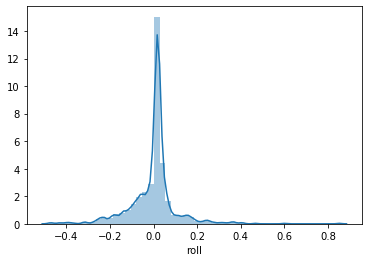

In [135]:
sb.distplot(final_df1['roll'])

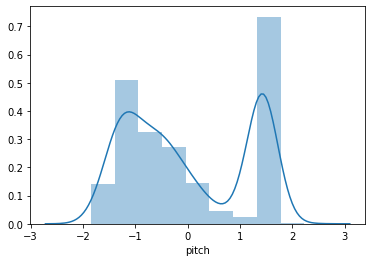

In [136]:
sb.distplot(final_df1['pitch'])